#Read File Zip

In [ ]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./MeatMe.zip", 'r')
zip_ref.extractall('tmp')

zip_ref.close()

# Directory with training fresh meat pictures
train_meat_dir = os.path.join('tmp/MeatMe/Training')
train_frmeat_dir = os.path.join('tmp/MeatMe/Training/Fresh')
# Directory with training half fresh meat pictures
train_hfmeat_dir = os.path.join('tmp/MeatMe/Training/Half_Fresh')
# Directory with training spoiled meat pictures
train_spmeat_dir = os.path.join('tmp/MeatMe/Training/Spoiled')
# Directory with training not meat pictures
train_notmeat_dir = os.path.join('tmp/MeatMe/Training/Not_Meat')

# Directory with validation fresh meat pictures
val_meat_dir = os.path.join('tmp/MeatMe/Validation')
val_frmeat_dir = os.path.join('tmp/MeatMe/Validation/Fresh')
# Directory with validation half fresh meat pictures
val_hfmeat_dir = os.path.join('tmp/MeatMe/Validation/Half_Fresh')
# Directory with validation spoiled meat pictures
val_spmeat_dir = os.path.join('tmp/MeatMe/Validation/Spoiled')
# Directory with validation not meat pictures
val_notmeat_dir = os.path.join('tmp/MeatMe/Validation/Not_Meat')

# Directory with training fresh meat pictures
test_meat_dir = os.path.join('tmp/MeatMe/Testing')
test_frmeat_dir = os.path.join('tmp/MeatMe/Testing/Fresh')
# Directory with training half fresh meat pictures
test_hfmeat_dir = os.path.join('tmp/MeatMe/Testing/Half_Fresh')
# Directory with training spoiled meat pictures
test_spmeat_dir = os.path.join('tmp/MeatMe/Testing/Spoiled')
# Directory with training not meat pictures
test_notmeat_dir = os.path.join('tmp/MeatMe/Testing/Not_Meat')


In [ ]:
print("Data Training:")
print('total training fresh meat images:', len(os.listdir(train_frmeat_dir)))
print('total training half fresh meat images:', len(os.listdir(train_hfmeat_dir)))
print('total training spoiled meat images: ', len(os.listdir(train_spmeat_dir)))
print('total training not meat images: ', len(os.listdir(train_notmeat_dir)))
print('\nData Validation:')
print('total validation fresh meat images:', len(os.listdir(val_frmeat_dir)))
print('total validation half fresh meat images:', len(os.listdir(val_hfmeat_dir)))
print('total validation spoiled meat images:', len(os.listdir(val_spmeat_dir)))
print('total validation not meat images: ', len(os.listdir(val_notmeat_dir)))
print('\nData Testing:')
print('total test fresh meat images:', len(os.listdir(test_frmeat_dir)))
print('total test half fresh meat images:', len(os.listdir(test_hfmeat_dir)))
print('total test spoiled meat images:', len(os.listdir(test_spmeat_dir)))
print('total test not meat images: ', len(os.listdir(test_notmeat_dir)))

Data Training:
total training fresh meat images: 595
total training half fresh meat images: 546
total training spoiled meat images:  434
total training not meat images:  560

Data Validation:
total validation fresh meat images: 170
total validation half fresh meat images: 156
total validation spoiled meat images: 124
total validation not meat images:  160

Data Testing:
total test fresh meat images: 85
total test half fresh meat images: 78
total test spoiled meat images: 62
total test not meat images:  80


In [ ]:
from pathlib import Path

# Create a list with the filepaths for training, validation, and testing
train_dir = Path('/content/tmp/MeatMe/Training')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

val_dir = Path('/content/tmp/MeatMe/Validation')
val_filepaths = list(val_dir.glob(r'**/*.jpg'))

test_dir = Path('/content/tmp/MeatMe/Testing')
test_filepaths = list(val_dir.glob(r'**/*.jpg'))

In [ ]:
 #Create a DataFrame with the filepath and the labels of the pictures
import numpy as np
import pandas as pd

def image_processing(filepath):

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath')
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df

In [ ]:
train_df = image_processing(train_filepaths)
val_df = image_processing(val_filepaths)
test_df = image_processing(test_filepaths)

In [ ]:
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

Number of different labels: 4

Labels: ['Not_Meat' 'Half_Fresh' 'Fresh' 'Spoiled']


In [ ]:
train_df.head(5)

,Filepath,Label
0,/content/tmp/MeatMe/Training/Not_Meat/photo-16...,Not_Meat
1,/content/tmp/MeatMe/Training/Not_Meat/photo-15...,Not_Meat
2,/content/tmp/MeatMe/Training/Half_Fresh/HALF-F...,Half_Fresh
3,/content/tmp/MeatMe/Training/Not_Meat/photo-16...,Not_Meat
4,/content/tmp/MeatMe/Training/Not_Meat/photo-14...,Not_Meat


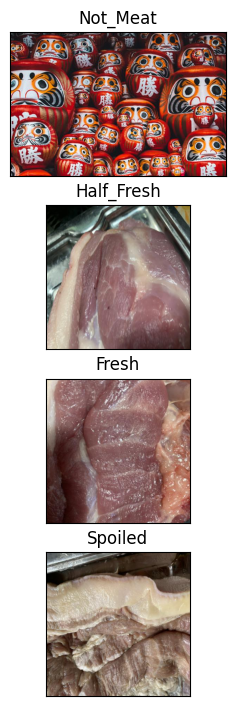

In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

#Build Model

In [ ]:
import tensorflow as tf

# Build the model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 128 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics = ["accuracy"])

#Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

testing_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [ ]:
# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory('tmp/MeatMe/Training',
                                                    target_size=(150, 150),  # All images will be resized to 150x150
                                                    batch_size=32,
                                                    seed=42,
                                                    class_mode='categorical',
)

validation_generator = validation_datagen.flow_from_directory('tmp/MeatMe/Validation',
                                                      target_size=(150,150),
                                                      batch_size=32,
                                                      seed=42,
                                                      class_mode='categorical',
                                                      shuffle=False
)

testing_generator = testing_datagen.flow_from_directory('tmp/MeatMe/Testing',
                                                      target_size=(150, 150),
                                                      batch_size=32,
                                                      shuffle=False,
                                                      seed=42,
                                                      class_mode='categorical'
)

Found 2135 images belonging to 4 classes.
Found 610 images belonging to 4 classes.
Found 305 images belonging to 4 classes.


#Callbacks

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.96:
                print("\nReached 96% accuracy so cancelling training!")

                # Stop training once the above condition is met
                self.model.stop_training = True

callbacks = myCallback()

#Training Model

In [ ]:
history = model.fit(
      train_generator,
      epochs=100,
      batch_size=32,
      validation_data = validation_generator,
      callbacks = [callbacks],
      verbose = 1)

Epoch 1/100
67/67 [==============================] - 132s 2s/step - loss: 1.0230 - accuracy: 0.4941 - val_loss: 0.8432 - val_accuracy: 0.6148
Epoch 2/100
67/67 [==============================] - 131s 2s/step - loss: 0.7824 - accuracy: 0.6075 - val_loss: 0.7284 - val_accuracy: 0.5721
Epoch 3/100
67/67 [==============================] - 131s 2s/step - loss: 0.7417 - accuracy: 0.6407 - val_loss: 0.6732 - val_accuracy: 0.6885
Epoch 4/100
67/67 [==============================] - 139s 2s/step - loss: 0.6544 - accuracy: 0.6838 - val_loss: 0.8787 - val_accuracy: 0.5852
Epoch 5/100
67/67 [==============================] - 142s 2s/step - loss: 0.6962 - accuracy: 0.6646 - val_loss: 0.7441 - val_accuracy: 0.7033
Epoch 6/100
67/67 [==============================] - 130s 2s/step - loss: 0.5864 - accuracy: 0.7124 - val_loss: 0.6370 - val_accuracy: 0.7721
Epoch 7/100
67/67 [==============================] - 130s 2s/step - loss: 0.5258 - accuracy: 0.7504 - val_loss: 0.7253 - val_accuracy: 0.7295
Epoch 

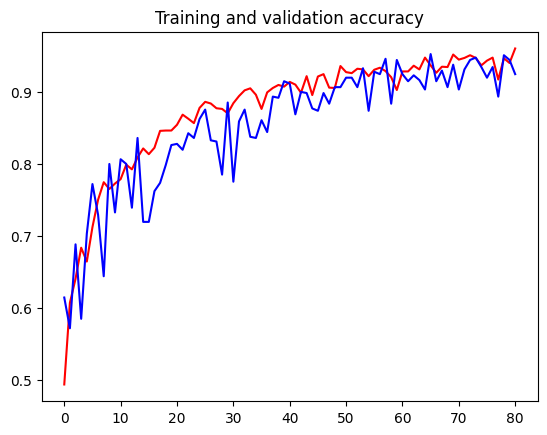

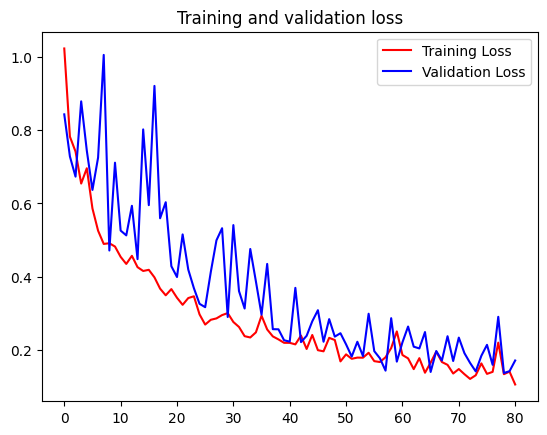

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Test

In [ ]:
from keras import models

batch_size = 32
test_score = model.evaluate_generator(testing_generator, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

<ipython-input-17-d60a982f4669>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model.evaluate_generator(testing_generator, batch_size)


[INFO] accuracy: 93.77%
[INFO] Loss:  0.15433885157108307


<ipython-input-23-11d0ab4c9391>:45: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(testing_generator)


Confusion Matrix
Normalized confusion matrix


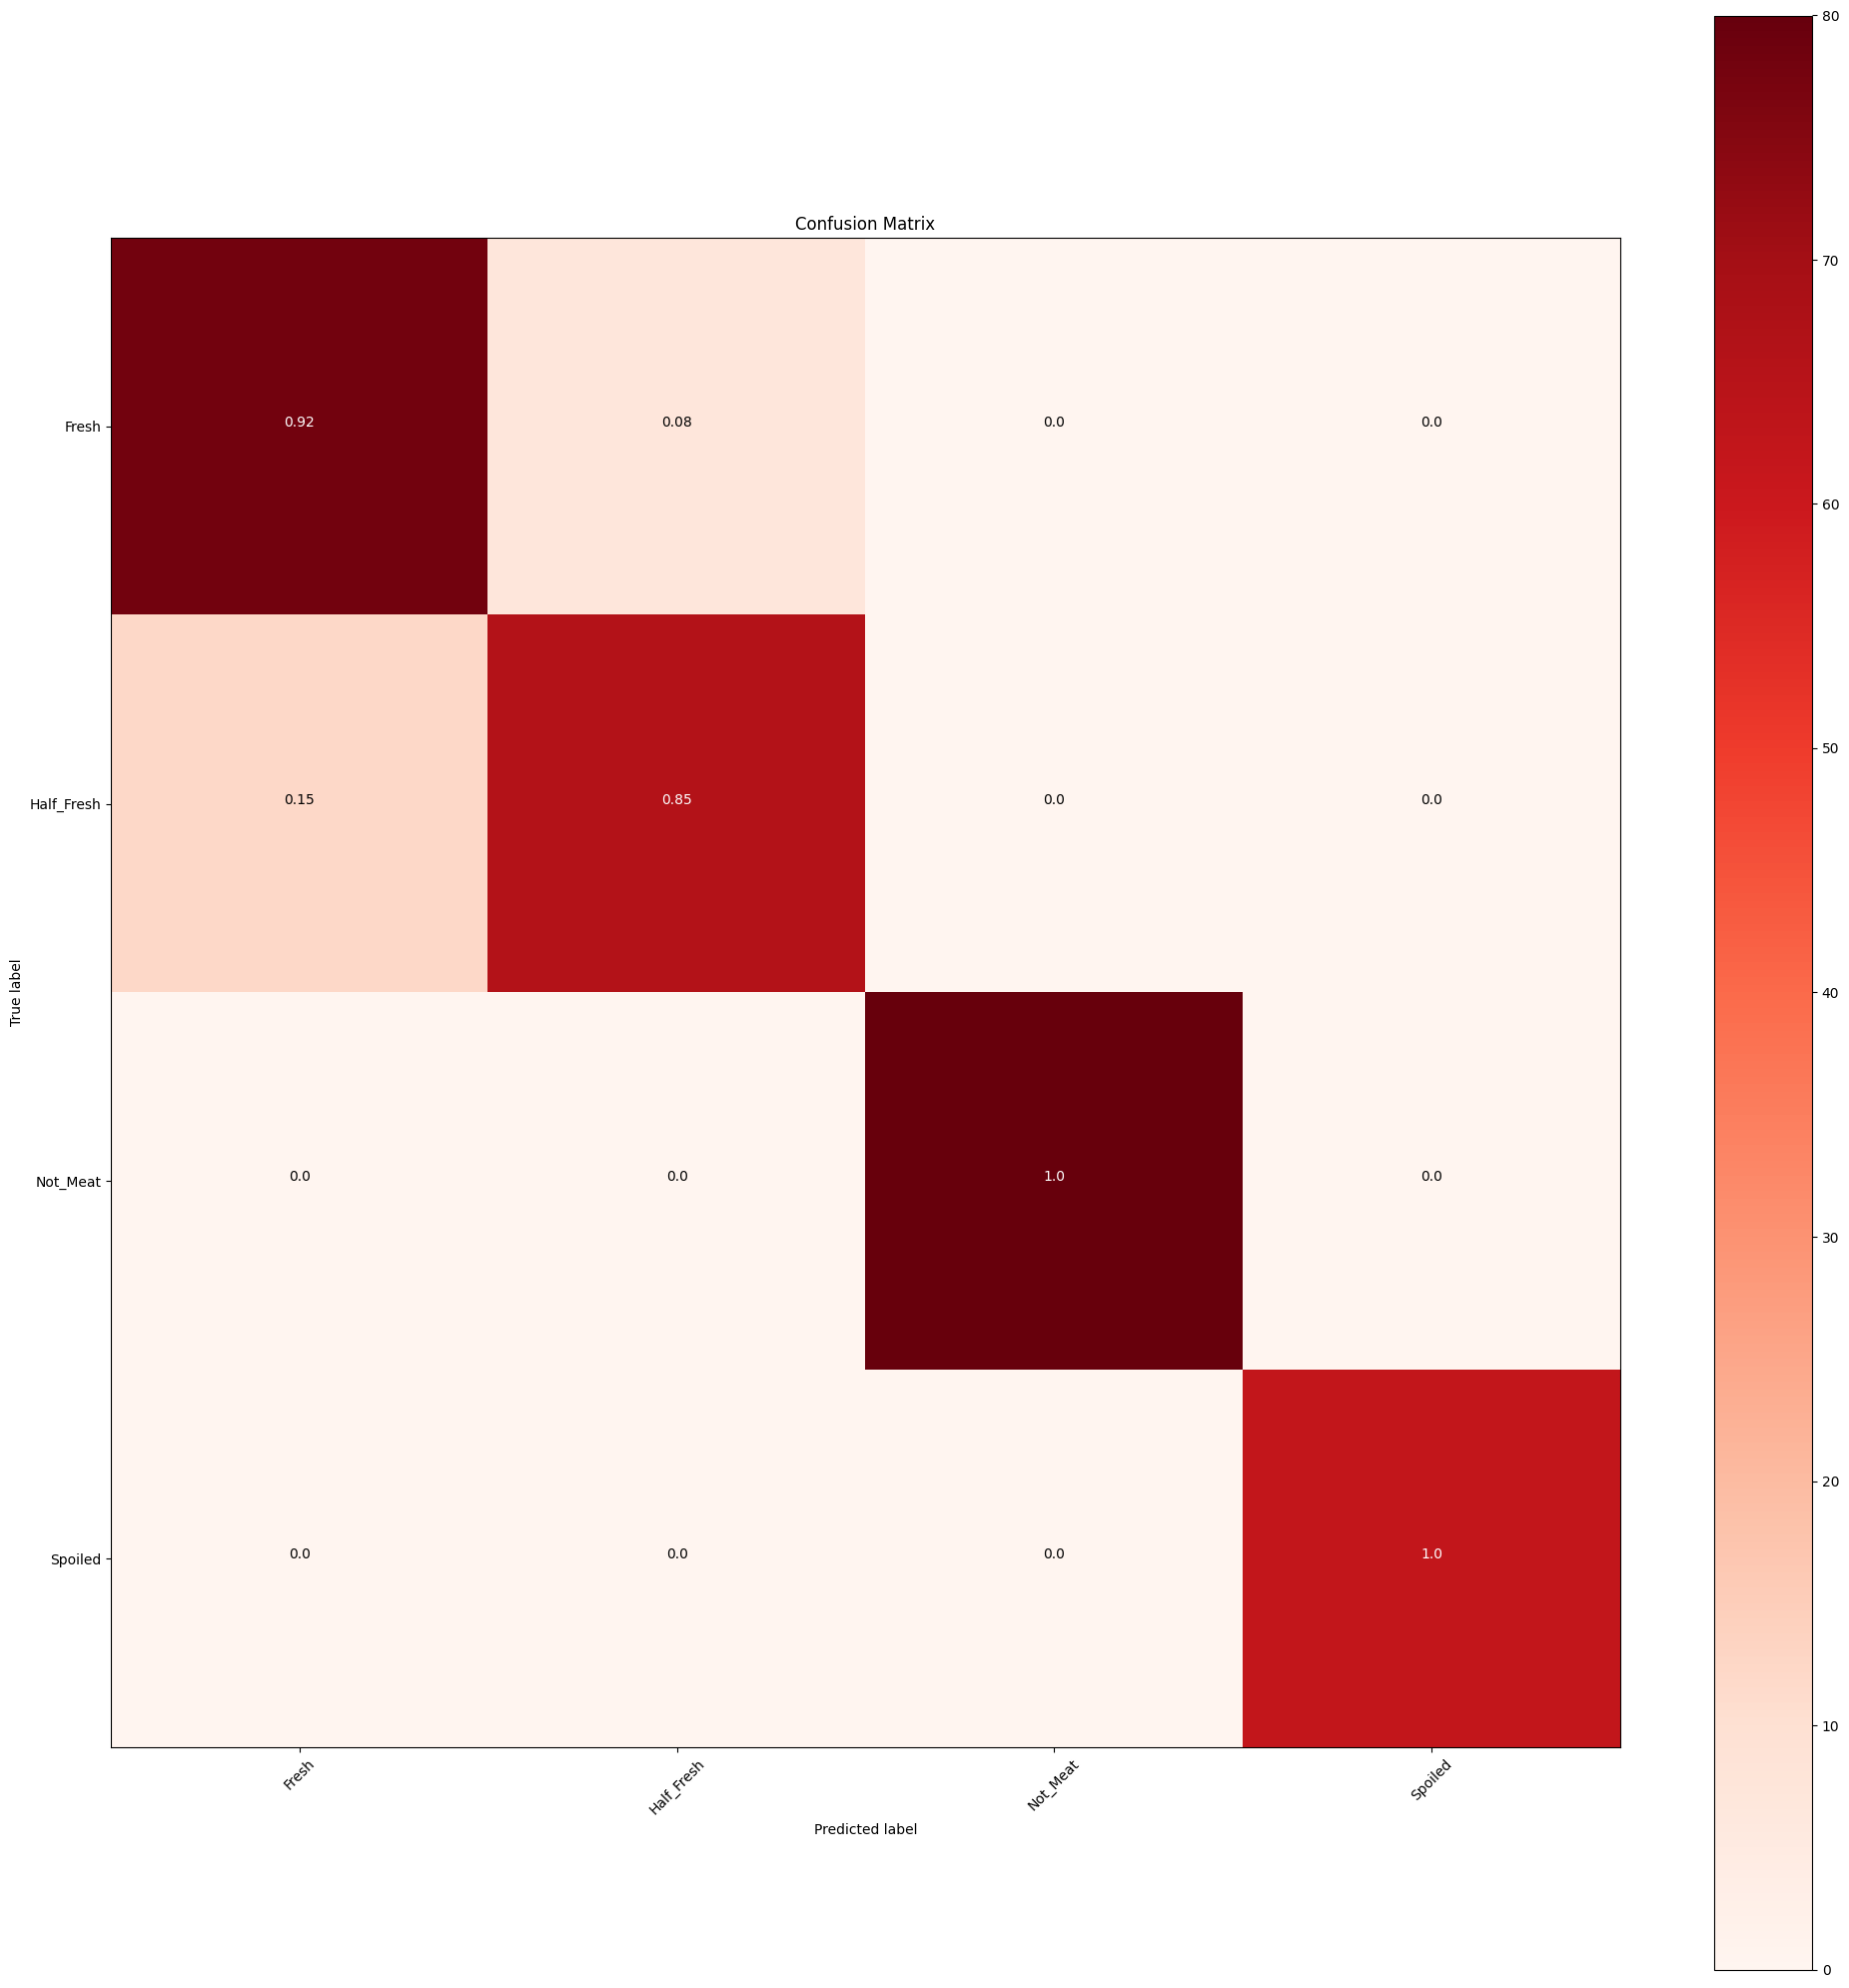

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Print the Target names
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

# Confusion Matrix
Y_pred = model.predict_generator(testing_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(testing_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
# Print Classification Report
print('Classification Report')
print(classification_report(testing_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       Fresh       0.87      0.92      0.89        85
  Half_Fresh       0.90      0.85      0.87        78
    Not_Meat       1.00      1.00      1.00        80
     Spoiled       1.00      1.00      1.00        62

    accuracy                           0.94       305
   macro avg       0.94      0.94      0.94       305
weighted avg       0.94      0.94      0.94       305



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Prediksi model dari generator
y_pred = model.predict_generator(test_generator)

# Ambil label sebenarnya dari generator
y_true = test_generator.classes

# Ubah prediksi menjadi kelas (0 atau 1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menghitung accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# Menghitung precision
precision = precision_score(y_true, y_pred_classes)

# Menghitung recall
recall = recall_score(y_true, y_pred_classes)

# Menghitung F1 score
f1 = f1_score(y_true, y_pred_classes)

# Menghitung confusion matrix
confusion = confusion_matrix(y_true, y_pred_classes)

# Menghitung sensitivity (true positive rate)
sensitivity = recall

# Menghitung specificity (true negative rate)
specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])

# Membuat laporan klasifikasi
classification_report_str = f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nSensitivity (True Positive Rate): {sensitivity}\nSpecificity (True Negative Rate): {specificity}\nConfusion Matrix:\n{confusion}"

# Mencetak laporan klasifikasi
print("Classification Report:")
print(classification_report_str)


Saved Model

In [ ]:
model.save('Model_MeatMe.h5')

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('Model_MeatMe.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

#Convert to .tflite

Saving WhatsApp Image 2023-06-03 at 11.19.02.jpeg to WhatsApp Image 2023-06-03 at 11.19.02.jpeg
1/1 [==============================] - 0s 35ms/step
Prediction is : Fresh


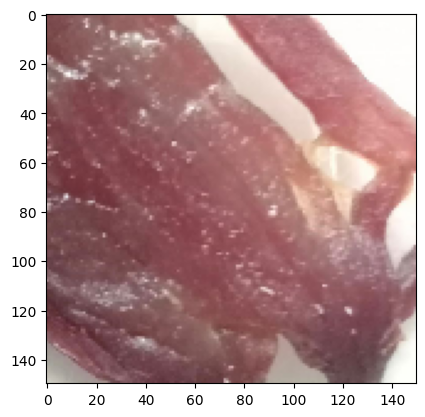

['Fresh', 'Half Fresh', 'Not Valid Image', 'Spoiled']
[[0.95516, 0.04466, 0.00018, 0.0]]


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  pred = model.predict(images)
  classes = ['Fresh', 'Half Fresh', 'Not Valid Image','Spoiled']

  # Limit the accuracy to 5 decimal places
  pred = [[round(p, 5) for p in pred[0]]]

  print(f"Prediction is : {classes[np.argmax(pred)]}")
  plt.imshow(img)
  plt.show()

  print(classes)
  print(pred)

In [ ]:
model = tf.keras.models.load_model('Model_MeatMe.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflmodel = converter.convert()
file = open( 'Model_MeatMe.tflite' , 'wb' )
file.write( tflmodel )

2175356